3.	Import the required packages with their customary aliases as follows:


In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.


In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')


5. How many rows and columns are in `gdp_df`? What are the data types of each column?
--There are 7176 rows and 4 columns



In [3]:
gdp_df.shape

(7176, 4)

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.


In [4]:
gdp_df = gdp_df.drop(['Value Footnotes'], axis =1) 
gdp_df.rename(columns = {"Country or Area":"Country"}, inplace=True)
gdp_df.rename(columns = {"Value":"GDP_Per_Capita"}, inplace=True)
gdp_df.rename(columns = {"Year":"Year"}, inplace=True)
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2020     1970.560169
1     Afghanistan  2019     2065.036235
2     Afghanistan  2018     2033.804389
3     Afghanistan  2017     2058.400221
4     Afghanistan  2016     2057.067978
...           ...   ...             ...
7171     Zimbabwe  1994     2603.927369
7172     Zimbabwe  1993     2420.092791
7173     Zimbabwe  1992     2437.152908
7174     Zimbabwe  1991     2733.696626
7175     Zimbabwe  1990     2652.129209

[7176 rows x 3 columns]


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 


In [5]:
gdp_df.Country.value_counts().index.tolist()

['Least developed countries: UN classification',
 'Niger',
 'Middle East & North Africa (IDA & IBRD)',
 'Middle income',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Nigeria',
 'Kenya',
 'North America',
 'North Macedonia',
 'Norway',
 'OECD members',
 'Oman',
 'Pacific island small states',
 'Pakistan',
 'Panama',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa',
 'Micronesia',
 'Mexico',
 'Korea',
 'Kyrgyz Republic',
 'Lao PDR',
 'Late-demographic dividend',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & Caribbean (IDA & IBRD)',
 'Africa Eastern and Southern',
 'Lebanon',
 'Lesotho',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Luxembourg',
 'Macao SAR, China',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mali',
 'Malta',
 'Marshall Islands',
 'Mauritania',
 'M

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


<Axes: title={'center': 'False'}>

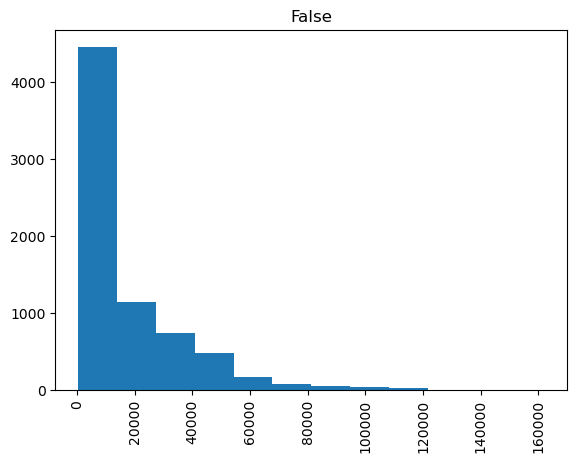

In [6]:
twen = gdp_df['Year'] == '2020'
gdp_df.hist(column = 'GDP_Per_Capita',by = twen, bins=12)

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

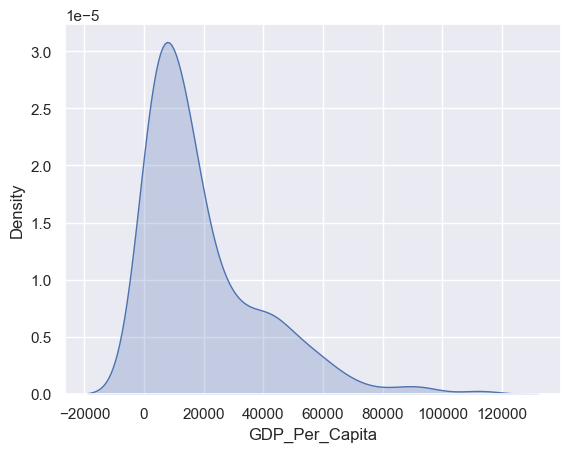

In [7]:
gdp_subset = gdp_df[gdp_df['Year'] == 2020]
sns.set(style = "darkgrid")
sns.kdeplot((gdp_subset['GDP_Per_Capita']), fill=True)

<Axes: xlabel='GDP_Per_Capita'>

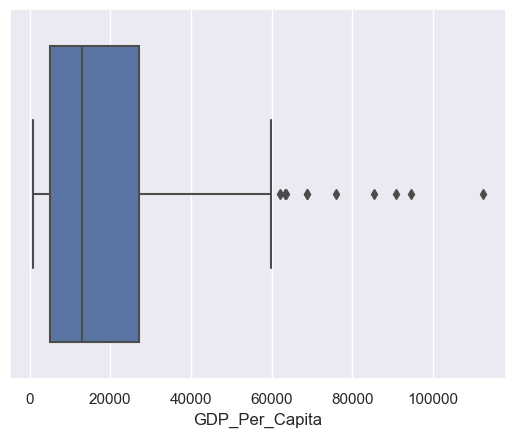

In [8]:
gdp_subset = gdp_df[gdp_df['Year'] == 2020]
sns.boxplot(data = gdp_subset, x="GDP_Per_Capita")

<Axes: xlabel='GDP_Per_Capita'>

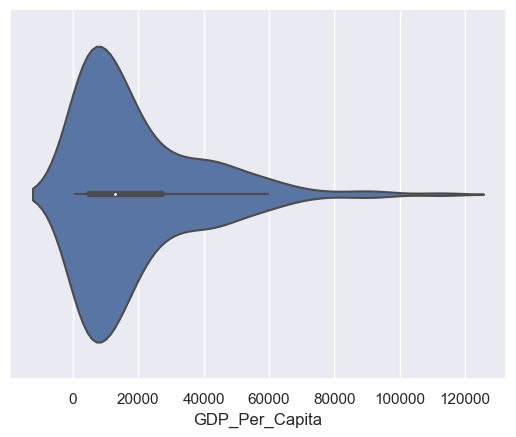

In [9]:
gdp_subset = gdp_df[gdp_df['Year'] == 2020]
sns.violinplot(x=gdp_subset["GDP_Per_Capita"])

9. What was the median GDP per capita value in 2020?

In [10]:
gdp_subset = gdp_df[gdp_df['Year'] == 2020]
gdp_subset['GDP_Per_Capita'].median()

12908.9374056206

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

<Axes: xlabel='GDP_Per_Capita'>

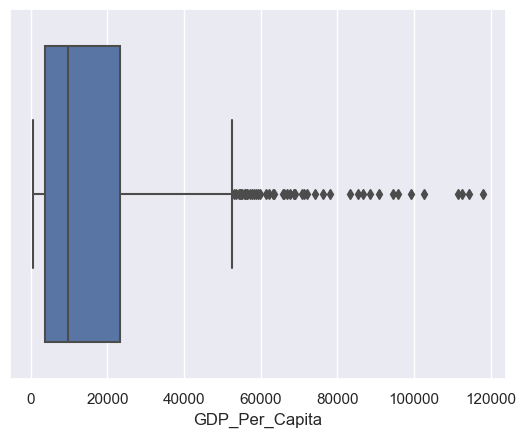

In [21]:
gdp_decades =gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
sns.boxplot(data = gdp_decades, x="GDP_Per_Capita")




<BarContainer object of 918 artists>

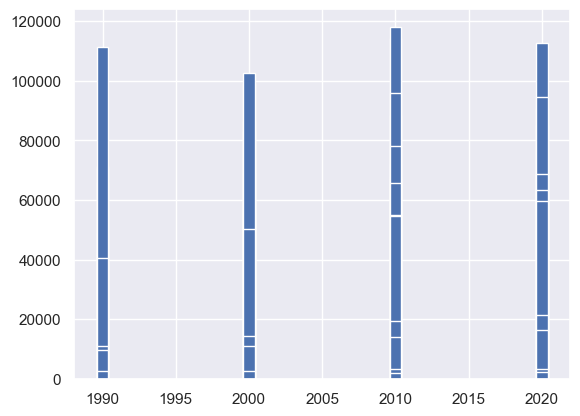

In [29]:
gdp_decades =gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
plt.bar(gdp_decades.Year, gdp_decades.GDP_Per_Capita)

<Axes: xlabel='GDP_Per_Capita', ylabel='Year'>

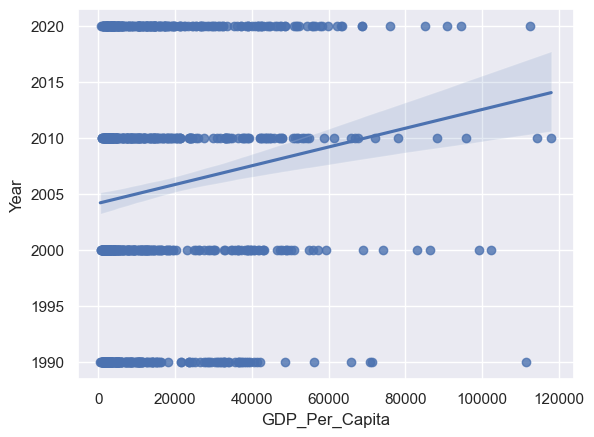

In [30]:
gdp_decades =gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
sns.regplot(x=gdp_decades["GDP_Per_Capita"], y=gdp_decades["Year"])

<Axes: xlabel='GDP_Per_Capita', ylabel='Year'>

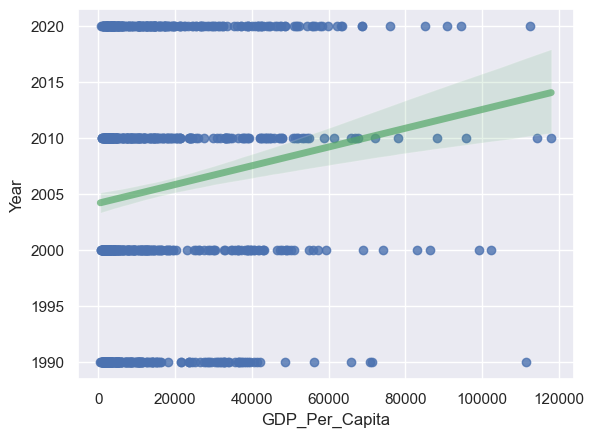

In [33]:
gdp_decades =gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
sns.regplot(x=gdp_decades["GDP_Per_Capita"], y=gdp_decades["Year"], line_kws={"color":"g","alpha":0.7,"lw":5})

11. Which country was the first to have a GDP per capita greater than $100,000?